# Developing a class for module illumination
Klaus Jäger, 28 April 2019

With respect to v0.2 the functions self.calc_irradiance_module_ground_direct() and self.calc_irradiance_module_ground_diffuse() were changed. They are now based on a matrix which is calculated in self.calc_irradiance_module_ground_matrix(). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import bifacial_geo as geo
%matplotlib inline

### Preamble

### Test the class

In [4]:
# Define the dictionary for the class
InputDict = {
    'L': 1.650,# module length, standard is 1650 mm or 1960 mm
    'theta_m_deg': 52., # Angle of the module with respect to the ground (first guess optimal theta_m = latitude on Earth)
    'D': 3.000, # distance between modules
    'H': 0.500, # height of module base above ground
    'DNI': 1, # direct normal irradiance
    'DHI': 1, # diffuse horizontal irradiance
    'theta_S_deg': np.array([30]), # zenith of the Sun
    'phi_S_deg': np.array([150]), # azimuth of the Sun
    'albedo': 0.3, # albedo of the ground
    'ground_steps': 101, #number of steps into which irradiance on the ground is evaluated in the interval [0,D]
    'module_steps': 12, # SET THIS NUMBER HIGHER FOR REAL EVALUATION! (SUGGESTION 20) number of lengths steps at which irradiance is evaluated on the module
    'angle_steps': 180 # Number at which angle discretization of ground light on module should be set
}

In [5]:
GI = geo.ModuleIllumination(InputDict) # GroundIllumination

### Figures for illustration
The figures only can be plotted after the class was established.

Text(0, 0.5, 'Irradiance on module (m$^{-2}$) (DHI = 1)')

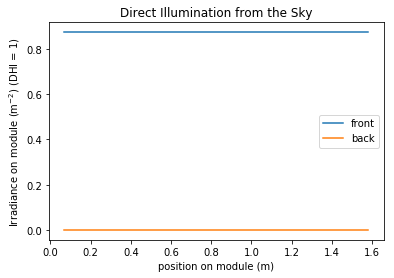

In [6]:
figure = plt.figure(figsize=(6,4))
plt.plot(GI.l_array,GI.results['irradiance_module_front_sky_direct'][0],label='front')
plt.plot(GI.l_array,GI.results['irradiance_module_back_sky_direct'][0],label='back')
plt.legend()
plt.title('Direct Illumination from the Sky')
plt.xlabel('position on module (m)')
plt.ylabel('Irradiance on module (m$^{-2}$) (DHI = 1)')

Text(0, 0.5, 'radiance from ground (m$^{-2}$) (DHI = 1)')

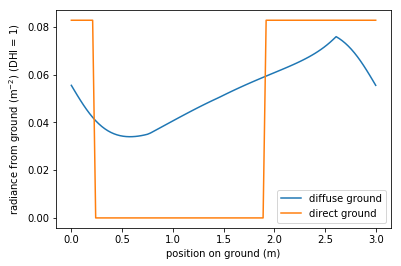

In [7]:
#dict['theta_S_deg'] = 30 # zenith of the Sun
#dict['phi_S_deg'] = 135 # azimuth of the Sun
#GI = ModuleIllumination(dict) # GroundIllumination
figure = plt.figure(figsize=(6,4))
plt.plot(GI.x_g_array,GI.results['radiance_ground_diffuse_emitted'],label='diffuse ground')
plt.plot(GI.x_g_array,GI.results['radiance_ground_direct_emitted'][0],label='direct ground')
plt.legend()
#plt.title('Diffuse illumination from the sky')
plt.xlabel('position on ground (m)')
plt.ylabel('radiance from ground (m$^{-2}$) (DHI = 1)')

Text(0, 0.5, 'Irradiance on module (m$^{-2}$) (DHI = 1)')

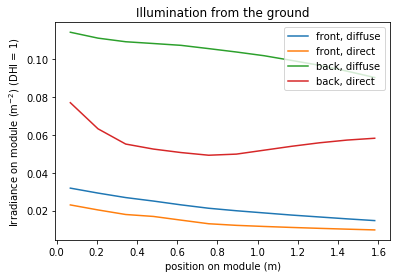

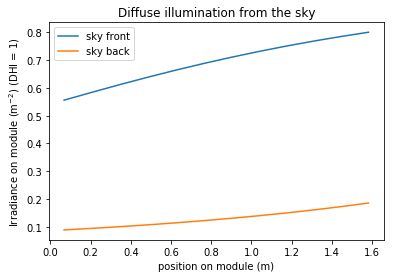

In [8]:
figure = plt.figure(figsize=(6,4))
plt.plot(GI.l_array,GI.results['irradiance_module_front_ground_diffuse'],label='front, diffuse')
plt.plot(GI.l_array,GI.results['irradiance_module_front_ground_direct'][0],label='front, direct')
plt.plot(GI.l_array,GI.results['irradiance_module_back_ground_diffuse'],label='back, diffuse')
plt.plot(GI.l_array,GI.results['irradiance_module_back_ground_direct'][0],label='back, direct')
plt.legend()
plt.title('Illumination from the ground')
plt.xlabel('position on module (m)')
plt.ylabel('Irradiance on module (m$^{-2}$) (DHI = 1)')
figure = plt.figure(figsize=(6,4))
plt.plot(GI.l_array,GI.results['irradiance_module_front_sky_diffuse'],label='sky front')
plt.plot(GI.l_array,GI.results['irradiance_module_back_sky_diffuse'],label='sky back')
plt.legend()
plt.title('Diffuse illumination from the sky')
plt.xlabel('position on module (m)')
plt.ylabel('Irradiance on module (m$^{-2}$) (DHI = 1)')

In [9]:
angle_matrix_front = GI.results['module_front_ground_matrix'].sum(axis=2)
angle_matrix_back = GI.results['module_back_ground_matrix'].sum(axis=2)

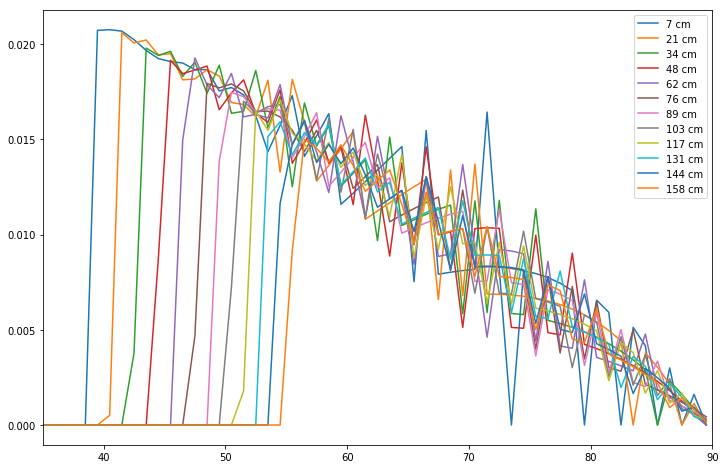

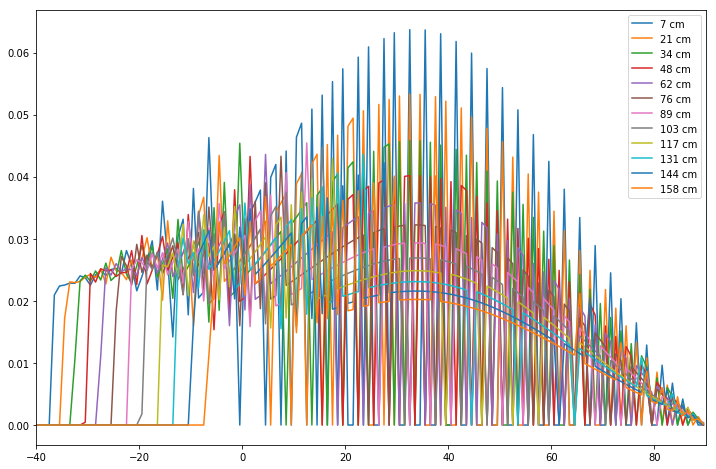

In [10]:
figure = plt.figure(figsize=(12,8))
angle_array = np.linspace(-89.5,89.5,InputDict['angle_steps'])
for i,l in enumerate(GI.l_array):
    plt.plot(angle_array,angle_matrix_front[i,:],label = '{:0.0f} cm'.format(l*100))
plt.xlim(35,90)
plt.legend()
figure = plt.figure(figsize=(12,8))
for i,l in enumerate(GI.l_array):
    plt.plot(angle_array,angle_matrix_back[i,:],label = '{:0.0f} cm'.format(l*100))
plt.xlim(-40,90)
plt.legend()
    